<a href="https://colab.research.google.com/github/1000PunchMan/DA_Python/blob/main/Yandex_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Задачи исследования
1. Осмотр данных
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии


2. Обработка данных
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- провести категоризацию


3. Ответы на вопросы
- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?


4. Результаты исследования
- Общие выводы

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное
положение и количество детей клиента на факт погашения кредита в срок.
Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного
скоринга — специальной системы, которая оценивает способность
потенциального заёмщика вернуть кредит банку.

Описание данных  
• children — количество детей в семье  
• days_employed — общий трудовой стаж в днях  
• dob_years — возраст клиента в годах  
• education — уровень образования клиента  
• education_id — идентификатор уровня образования  
• family_status — семейное положение  
• family_status_id — идентификатор семейного положения  
• gender — пол клиента  
• income_type — тип занятости  
• debt — имел ли задолженность по возврату кредитов  
• total_income — ежемесячный доход  
• purpose — цель получения кредита  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


# Предобработка

Видно, что в даннных имеются пропуски  
Наблюдаются ошибки в столбцах children и days_employyed (отрицательные значения, а также выбросы)

Просмотрим столбики на ошибки и обработаем пропуски

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


## Работа с пропусками/дубликатами и ошибками

**children**  
Заменим значения -1 на 1, а также 20 на 2 (вероятно, это опечатка)


In [ ]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [ ]:
df['children'] = df['children'].replace(20,2)
df['children'] = df['children'].replace(-1,1)

In [ ]:
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

**days_employed**  

In [ ]:
df['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Превратим отрицательные значения в положительные

In [ ]:
df['days_employed'] = abs(df['days_employed'])

In [ ]:
df['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Посмотрим на распределение, чтобы выявить аномалии

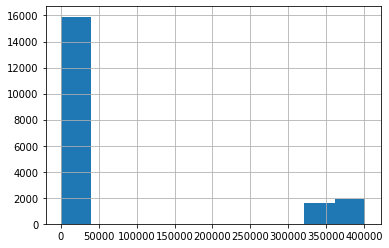

In [ ]:
df['days_employed'].hist()

Видно, что у нас имеются выбросы.  
Рассмотрим значения, которые являются выбросами (т.к. их достаточно много)

In [ ]:
df[df['days_employed'] > 100000].sort_values(by = 'days_employed')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
20444,0,328728.720605,72,среднее,1,вдовец / вдова,2,F,пенсионер,0,96519.339647,покупка жилья для семьи
9328,2,328734.923996,41,высшее,0,женат / замужем,0,M,пенсионер,0,126997.497760,операции со своей недвижимостью
17782,0,328771.341387,56,среднее,1,женат / замужем,0,F,пенсионер,0,68648.047062,операции с коммерческой недвижимостью
14783,0,328795.726728,62,высшее,0,женат / замужем,0,F,пенсионер,0,79940.196752,на покупку своего автомобиля
7229,1,328827.345667,32,среднее,1,гражданский брак,1,F,пенсионер,0,122162.965695,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования


In [ ]:
3445/19351.000000

0.1780269753501111

Доля выбросов составляет 18%.  
Это достаточно большая доля, для того, чтобы просто ее выкинуть из выборки (можем потерять ценные данные).

Вероятно, что данные показатели выгружены с ошибкой, а именно вместо дней, данные представлены в часах  
Посмотрим, что получится, если преобразуем аномально большие данные, поделив их на 24 (кол-во часов)

In [ ]:
328728.720605	/24

13697.030025208333

In [ ]:
df.loc[df['days_employed'] > 100000, 'days_employed'] = df['days_employed']/24

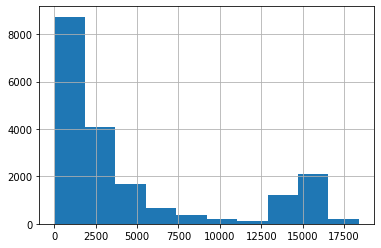

In [ ]:
df['days_employed'].hist()

In [ ]:
17500/365

47.945205479452056

Теперь показатель 'days_employed' выглядит правдоподобно

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [ ]:
2174 / 21525

0.10099883855981417

пропуски в days_employed заменим на 0, так как в дальнейшем данный показатель нам будет ненужен.  
Пропуски же в total_income заменим далее, когда произведем категоризацию данных (чтобы выборки были репрезентативными и лучше отражали данные).

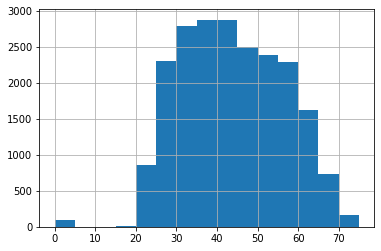

In [ ]:
df['dob_years'].hist(bins = 15)

Видно, что есть данные где возраст клиента = 0, посмотрим на них

In [ ]:
len(df[df['dob_years'] <15])

101

удалим данных клиентов, чтобы их ошибочные показатели не портили результаты анализа. 

In [ ]:
df=df.query('dob_years >= 18')

In [ ]:
df['education']=df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Удалим дубликаты

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates().reset_index(drop=True) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21347 entries, 0 to 21352
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   children           21347 non-null  int64   
 1   days_employed      19255 non-null  float64 
 2   dob_years          21347 non-null  int64   
 3   education          21347 non-null  object  
 4   education_id       21347 non-null  int64   
 5   family_status      21347 non-null  object  
 6   family_status_id   21347 non-null  int64   
 7   gender             21347 non-null  object  
 8   income_type        21347 non-null  object  
 9   debt               21347 non-null  int64   
 10  total_income       21347 non-null  float64 
 11  purpose            21347 non-null  object  
 12  num_of_child       21347 non-null  object  
 13  type_of_education  21347 non-null  object  
 14  categ_family       21347 non-null  object  
 15  income_for_na      21347 non-null  float64 
 16  inco

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
df.groupby(['education','family_status','income_type'])['total_income'].transform('median')

0        168529.808588
1        137014.951480
2        137014.951480
3        137014.951480
4        115290.905764
             ...      
21348    158696.519524
21349    114197.304857
21350    137666.609664
21351    137014.951480
21352    137014.951480
Name: total_income, Length: 21353, dtype: float64

In [ ]:
df['family_status'].value_counts()

женат / замужем          12290
гражданский брак          4130
не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: family_status, dtype: int64

In [ ]:
df.groupby('family_status')['debt'].mean()

family_status
в разводе                0.071730
вдовец / вдова           0.064990
гражданский брак         0.093462
женат / замужем          0.075427
не женат / не замужем    0.097709
Name: debt, dtype: float64

## Категоризация данных

In [ ]:
df['children'].value_counts()

0    14022
1     4839
2     2114
3      328
4       41
5        9
Name: children, dtype: int64

In [ ]:
def children(count):
  if count == 0:
    return 'без детей'
  if count == 1:
    return '1 ребёнок'
  if count > 1:
    return 'более одного ребёнка'

In [ ]:
df['num_of_child'] = df['children'].apply(children)

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,num_of_child
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1 ребёнок
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1 ребёнок
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,без детей
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,более одного ребёнка
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,без детей


In [ ]:
df['num_of_child'].value_counts()

без детей               14022
1 ребёнок                4839
более одного ребёнка     2492
Name: num_of_child, dtype: int64

In [ ]:
df['education'].value_counts()

среднее                15108
высшее                  5215
неоконченное высшее      742
начальное                282
ученая степень             6
Name: education, dtype: int64

In [ ]:
def studying(education):
  if education == 'высшее':
    return 'высшее'
  if education == 'ученая степень':
    return 'высшее'
  return 'нет высшего'


In [ ]:
df['type_of_education'] = df['education'].apply(studying)

In [ ]:
df['type_of_education'].value_counts()

нет высшего    16132
высшее          5221
Name: type_of_education, dtype: int64

In [ ]:
df['family_status'].value_counts()

женат / замужем          12290
гражданский брак          4130
не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: family_status, dtype: int64

In [ ]:
def family(op):
  if op == 'женат / замужем':
    return 'женат / замужем'
  if op=='гражданский брак':
    return 'гражданский брак'
  return 'Не женат / не замужем'

In [ ]:
df['categ_family'] = df['family_status'].apply(family)

In [ ]:
df['categ_family'].value_counts()

женат / замужем          12290
Не женат / не замужем     4933
гражданский брак          4130
Name: categ_family, dtype: int64

In [ ]:
df['income_type'].value_counts()

сотрудник          11029
компаньон           5058
пенсионер           3809
госслужащий         1451
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [ ]:
df = df.query('income_type == "сотрудник" or income_type == "компаньон" or income_type == "пенсионер" or income_type == "госслужащий"')

In [ ]:
df['income_type'].value_counts()

сотрудник      11029
компаньон       5058
пенсионер       3809
госслужащий     1451
Name: income_type, dtype: int64

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,num_of_child,type_of_education,categ_family
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1 ребёнок,высшее,женат / замужем
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1 ребёнок,нет высшего,женат / замужем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,без детей,нет высшего,женат / замужем
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,более одного ребёнка,нет высшего,женат / замужем
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,без детей,нет высшего,гражданский брак


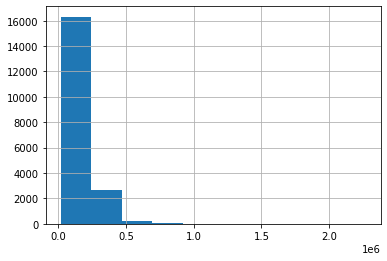

In [ ]:
df['total_income'].hist()

In [ ]:
df['total_income'].sort_values(ascending = False)

12327    2.265604e+06
19452    2.200852e+06
9115     1.726276e+06
20643    1.715018e+06
17051    1.711309e+06
             ...     
21317             NaN
21323             NaN
21325             NaN
21330             NaN
21338             NaN
Name: total_income, Length: 21347, dtype: float64

Заменим пропуски в total_income исходя из медианы total_income по сгуруппированым столбцам 'type_of_education','categ_family','income_type'

In [ ]:
df['income_for_na'] = df.groupby(['type_of_education','categ_family','income_type'])['total_income'].transform('median')

In [ ]:
df['total_income'] = df['total_income'].fillna(df['income_for_na'])

In [ ]:
df['total_income'].describe()

count    2.134700e+04
mean     1.654936e+05
std      9.835675e+04
min      2.066726e+04
25%      1.076684e+05
50%      1.431890e+05
75%      1.975871e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [ ]:
df['income_group']=pd.qcut(df['total_income'],3)

In [ ]:
df['income_group'].value_counts()

(173218.024, 2265604.029]    7116
(20667.263, 119870.224]      7116
(119870.224, 173218.024]     7115
Name: income_group, dtype: int64

In [ ]:
df['age_group'] = pd.qcut(df['dob_years'],3)

In [ ]:
df['dob_years'].describe()

count    21347.000000
mean        43.477725
std         12.241890
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21347 entries, 0 to 21352
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   children           21347 non-null  int64   
 1   days_employed      19255 non-null  float64 
 2   dob_years          21347 non-null  int64   
 3   education          21347 non-null  object  
 4   education_id       21347 non-null  int64   
 5   family_status      21347 non-null  object  
 6   family_status_id   21347 non-null  int64   
 7   gender             21347 non-null  object  
 8   income_type        21347 non-null  object  
 9   debt               21347 non-null  int64   
 10  total_income       21347 non-null  float64 
 11  purpose            21347 non-null  object  
 12  num_of_child       21347 non-null  object  
 13  type_of_education  21347 non-null  object  
 14  categ_family       21347 non-null  object  
 15  income_for_na      21347 non-null  float64 
 16  inco

# Анализ

**Ответы на вопросы**  
Есть ли зависимость между наличием детей и возвратом кредита в срок?  
Есть ли зависимость между семейным положением и возвратом кредита в срок?  
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  
Как разные цели кредита влияют на его возврат в срок?  

**Есть ли зависимость между наличием детей и возвратом кредита в срок?**

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,num_of_child,type_of_education,categ_family,income_for_na,income_group,age_group
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1 ребёнок,высшее,женат / замужем,168629.247649,"(173218.024, 2265604.029]","(36.0, 50.0]"
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,1 ребёнок,нет высшего,женат / замужем,137192.823062,"(20667.263, 119870.224]","(18.999, 36.0]"
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,без детей,нет высшего,женат / замужем,137192.823062,"(119870.224, 173218.024]","(18.999, 36.0]"
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,более одного ребёнка,нет высшего,женат / замужем,137192.823062,"(173218.024, 2265604.029]","(18.999, 36.0]"
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,без детей,нет высшего,гражданский брак,113350.048684,"(119870.224, 173218.024]","(50.0, 75.0]"


In [ ]:
df.groupby('num_of_child')['debt'].agg(['count','mean'])

,count,mean
num_of_child,,
1 ребёнок,4838,0.091153
без детей,14018,0.075474
более одного ребёнка,2491,0.093135


Видно, что наименьший показатель у людей, неимеющих детей.  
Явной связи нет, возможно на результаты влияет другая(ие) переменная(ые). Сначала ответим на вопросы, указанные выше, затем попробуем определить, какая переменная может оказывать влияние на показатели.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [ ]:
df.groupby('categ_family')['debt'].agg(['count','mean'])

,count,mean
categ_family,,
Не женат / не замужем,4932,0.085158
гражданский брак,4128,0.093508
женат / замужем,12287,0.075283


Наименьший показать по просрочке у клиентов, находящихся в браке. Далее - не в браке. И самый высокий показатель по задолженности у "гражданского брака".  
Аналогично, возможно влияние другого фактора.

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [ ]:
df.groupby('income_group')['debt'].agg(['count','mean'])

,count,mean
income_group,,
"(20667.263, 119870.224]",7116,0.080804
"(119870.224, 173218.024]",7115,0.088545
"(173218.024, 2265604.029]",7116,0.073918


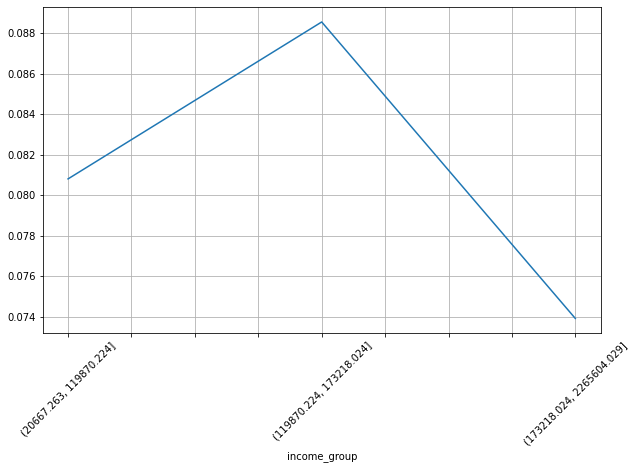

In [ ]:
df.groupby('income_group')['debt'].mean().plot(rot = 45, grid = True, figsize = (10,6))

видно, что наибольший невозврат у группы со средним доходом. после этой группы задолженность имеет отрицательную тенденцию.  
В группе с самым высоким доходом самый низкий процент невозврата.  
Возможна связь с размером кредита, но, к сожалению, таких данных у нас нету.


**Посмотрим есть ли зависимость от возраста**

In [ ]:
df.groupby('age_group')['debt'].agg(['count','mean'])

,count,mean
age_group,,
"(18.999, 36.0]",7134,0.103729
"(36.0, 50.0]",7570,0.080581
"(50.0, 75.0]",6643,0.057354


Тут видна чёткая связь - чем моложе группа, тем выше процент задолженности.  
Потенциально, это один из факторов, который может влиять на результаты группировок по другим показателям.  
Далее проверим на взаимосвязь другие показатели с просрочкой. Затем попробуем посмотреть, могли ли они оказать влияние на другие переменные

**Уровень образования и просроченная задолженность**

In [ ]:
df.groupby('type_of_education')['debt'].agg(['count','mean'])

,count,mean
type_of_education,,
высшее,5217,0.053096
нет высшего,16130,0.090143


Видна большая разница в полученных значениях. Вероятно, это вторая переменная, влияющая на другие. 

Ща проверим как распределена задолженность между возрастными группами

In [ ]:
df.groupby(['income_group', 'age_group'])['debt'].agg(['count','mean'])

count      mean
income_group              age_group                      
(20667.263, 119870.224]   (18.999, 36.0]   2130  0.106103
                          (36.0, 50.0]     2173  0.091118
                          (50.0, 75.0]     2813  0.053679
(119870.224, 173218.024]  (18.999, 36.0]   2543  0.116398
                          (36.0, 50.0]     2574  0.081585
                          (50.0, 75.0]     1998  0.062062
(173218.024, 2265604.029] (18.999, 36.0]   2461  0.088582
                          (36.0, 50.0]     2823  0.071555
                          (50.0, 75.0]     1832  0.057860

Видно, что у группы с высоким доходом вне зависимости от возраста показатель просрочки ниже, чем у других заработных групп. 

**Посмотрим как выглядит сводная таблица по показателям возраста/образования с показателями, которые были выдвинуты в задание.**

**Количество детей**

In [ ]:
df.groupby('num_of_child')['debt'].agg(['count','mean'])

,count,mean
num_of_child,,
1 ребёнок,4838,0.091153
без детей,14018,0.075474
более одного ребёнка,2491,0.093135


In [ ]:
df.groupby(['num_of_child','type_of_education'])['debt'].agg(['count','mean'])

count      mean
num_of_child         type_of_education                 
1 ребёнок            высшее              1325  0.054340
                     нет высшего         3513  0.105038
без детей            высшее              3236  0.053152
                     нет высшего        10782  0.082174
более одного ребёнка высшее               656  0.050305
                     нет высшего         1835  0.108447


Клиент, имеющий высшее образование, независимо от кол-ва детей имеет низкую долю просрочек.

In [ ]:
df.groupby(['num_of_child','age_group'])['debt'].agg(['count','mean'])

count      mean
num_of_child         age_group                      
1 ребёнок            (18.999, 36.0]   2210  0.103620
                     (36.0, 50.0]     2059  0.087907
                     (50.0, 75.0]      569  0.054482
без детей            (18.999, 36.0]   3540  0.103672
                     (36.0, 50.0]     4490  0.077060
                     (50.0, 75.0]     5988  0.057615
более одного ребёнка (18.999, 36.0]   1384  0.104046
                     (36.0, 50.0]     1021  0.081293
                     (50.0, 75.0]       86  0.058140

- Тут видно, что в категории "без детей" большая доля людей в старшей возрастной группе, где процент задолженности наименьший.  
- Также видно, что в целом у категории "1 ребёнок" и "более одного ребёнка" доля просроченности одинакова, однако соотношение категорий внутри группы разное - "более одного ребёнка" имеет меньшую долю старшей возрастной группы, что влияет на итоговый показатель.

**Семейный статус**

In [ ]:
df.groupby('categ_family')['debt'].agg(['count','mean'])

,count,mean
categ_family,,
Не женат / не замужем,4932,0.085158
гражданский брак,4128,0.093508
женат / замужем,12287,0.075283


In [ ]:
df.groupby(['categ_family','type_of_education'])['debt'].agg(['count','mean'])

count      mean
categ_family          type_of_education                 
Не женат / не замужем высшее              1242  0.053945
                      нет высшего         3690  0.095664
гражданский брак      высшее               945  0.058201
                      нет высшего         3183  0.103990
женат / замужем       высшее              3030  0.051155
                      нет высшего         9257  0.083180

Тут четкой связи образования и семейного статуса не наблюдается

In [ ]:
df.groupby(['categ_family','age_group'])['debt'].agg(['count','mean'])

count      mean
categ_family          age_group                      
Не женат / не замужем (18.999, 36.0]   1735  0.112392
                      (36.0, 50.0]     1416  0.081921
                      (50.0, 75.0]     1781  0.061202
гражданский брак      (18.999, 36.0]   1487  0.108944
                      (36.0, 50.0]     1528  0.098168
                      (50.0, 75.0]     1113  0.066487
женат / замужем       (18.999, 36.0]   3912  0.097904
                      (36.0, 50.0]     4626  0.074362
                      (50.0, 75.0]     3749  0.052814

Вне зависимости от возраста, группа 'женат/замужем' имеет самые низкие показатели.  
Возможно, в группе "женатых" более обеспеченные люди, так как, в основном, чтобы содержать семью, должна быть стабильность в финансом плане.

In [ ]:
df.groupby(['categ_family','income_group'])['debt'].agg(['count','mean'])

count      mean
categ_family          income_group                              
Не женат / не замужем (20667.263, 119870.224]     1705  0.076246
                      (119870.224, 173218.024]    1655  0.095468
                      (173218.024, 2265604.029]   1572  0.083969
гражданский брак      (20667.263, 119870.224]     1381  0.099203
                      (119870.224, 173218.024]    1363  0.108584
                      (173218.024, 2265604.029]   1384  0.072977
женат / замужем       (20667.263, 119870.224]     4030  0.076427
                      (119870.224, 173218.024]    4097  0.079082
                      (173218.024, 2265604.029]   4160  0.070433

Видим, что наше предположение было неверным, относительно того, что у "женатых" доля обеспеченных людей больше. Везде одинаковое приблизительно равномерное распределение.  
Возможно, тогда имеет вес психологический фактор, что клиенты, находящиеся в браке, являются более ответственными. 

**Ежемесячный доход**

In [ ]:
df.groupby('income_group')['debt'].agg(['count','mean'])

,count,mean
income_group,,
"(20667.263, 119870.224]",7116,0.080804
"(119870.224, 173218.024]",7115,0.088545
"(173218.024, 2265604.029]",7116,0.073918


In [ ]:
df.groupby(['income_group','age_group'])['debt'].agg(['count','mean'])

count      mean
income_group              age_group                      
(20667.263, 119870.224]   (18.999, 36.0]   2130  0.106103
                          (36.0, 50.0]     2173  0.091118
                          (50.0, 75.0]     2813  0.053679
(119870.224, 173218.024]  (18.999, 36.0]   2543  0.116398
                          (36.0, 50.0]     2574  0.081585
                          (50.0, 75.0]     1998  0.062062
(173218.024, 2265604.029] (18.999, 36.0]   2461  0.088582
                          (36.0, 50.0]     2823  0.071555
                          (50.0, 75.0]     1832  0.057860

Вне зависимости от возраста, средний показатель по задолженности у самой обеспеченной группы ниже остальных.  
Почему же у средней по доходу группы показатель выше, чем у группы с низким доходом? Не до конца понятно, возможно, причина в сумме кредита.

In [ ]:
df.groupby(['income_group','type_of_education'])['debt'].agg(['count','mean'])

count      mean
income_group              type_of_education                 
(20667.263, 119870.224]   высшее              1024  0.047852
                          нет высшего         6092  0.086343
(119870.224, 173218.024]  высшее              1592  0.064070
                          нет высшего         5523  0.095600
(173218.024, 2265604.029] высшее              2601  0.048443
                          нет высшего         4515  0.088594

В группе с самым высоким доходом доля клиентов с высшим образованием самая большая, что обьясняет низкую просрочку у данной группы.
В остальных группах связи не обнаружено.

-----------------------------------------------------------

#Общий вывод

- Основные факторы, оказывающие влияние на своевременный возврат кредита - возраст, уровень образования.
- Чем старше клиент, тем выше вероятность, что кредит будет возвращён вовремя. 
- Если клиент имеет высшее образование вероятность своевременного возврата будет выше, чем у того, кто не имеет высшего. 
- Количество детей напрямую не влияет на вероятность просроченной задолженности. В данном случае, самый низкий процент был у группы, неимеющей детей потому, что в ней наибольшую долю занимали клиенты, старшей возрастной категории, имеющие самую низкую просрочку. 
- Семейный статус "хорошего" клиента - 'женат/замужем'. Просрочка в этой группе является самой низкой внезависимости от группировки по возрасту, доходу, уровню образования. Причиной тому может быть, что люди, находящиеся в браке являются более ответственными, так как отвечают не только за себя, но и за членов своей семьи. В группах 'гражданский брак', 'не женат/не замужем' чёткой связи с другими переменными не выявлено. Показатели везде +- одинаковые. 
- Наименьшую долю задолженности имеют клиенты с высоким доходом. Вне зависимости от возраста, средний показатель по задолженности у самой обеспеченной группы ниже остальных.  В группе с самым высоким доходом доля клиентов с высшим образованием самая большая, что обьясняет низкую просрочку у данной группы. Наибольшая доля просроченности у клиентов из группы со средним доходом (117т.р - 173т.р.). Определенной связи не выявлено, объясняющей данный факт. Предположение, что может оказывать влияние размер кредита. 

Таким образом, подведём итоги.  
"Хороший" клиент для банка обладает следующими показателями:
1. Человек взрослого возраста (>50 лет. Чем старше, тем лучше)
2. Имеет высшее образование
3. Женат
4. С высоким уровнем дохода

"Плохой" клиент:
1. Молодой (Чем моложе, тем хуже) 
2. Не имеет высшего образования
3. Не женат/гражданский брак
4. Cо средним доходом